[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/PongthepGeo/ML_22/blob/master/07_data_visualization.ipynb)

### Data visualization

Data visualization using **matplotlib** library is one of the most popular visualization in open source community. There are other libraries available such as plotly, seaborn, GGplot, altair, bokeh, and pygal. 
Once we are familiar with matplotlib, we can compare pros and cons with other visualization libraries.

```bat
pip install matplotlib
pip install seaborn
```

#### 1. General plot function

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt

list_data = [9, 45, 7, 57, 32, 39.8]
plt.plot(list_data, linestyle='dotted', color='red')

We can call **plot** function to plot a line and can control color and line style using arguments showning below. More details can be found [here](https://matplotlib.org/2.1.2/api/_as_gen/matplotlib.pyplot.plot.html). Matplotlib also provides more plotting options such as axis, legend, and title.


In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

list_y1 = [9, 45, 7, 57, 32, 39.8]
list_y2 = [26, 5, 47, 50, 20, 21]
array_x = np.linspace(0, 10, len(list_y1)) # mix numpy array and list to plot

plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plt.plot(array_x, list_y1, linestyle='solid', color='green')
plt.plot(array_x, list_y2, linestyle='dashdot', color='blue')
plt.title('Comparing Data')
plt.xlabel('axis x')
plt.ylabel('axis y')
plt.legend(['data green', 'data blue'])

#### 2. Plot data from Pandas

Typically, Pandas have built-in plot functions but we found that transforming the data from Pandas dataframe into Python numpy array can provide more control.

Let's import one example of well log data and visualize a scattering plot between column name **GR** and **ILD_log10**.

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

Exploring data.

In [ ]:
# NOTE explore data information
print(data.describe())
# NOTE check number of NaN
null_value_stats = data.isnull().sum(axis=0)
print(null_value_stats[null_value_stats != 0])
# NOTE check data types
print(data.dtypes)
# NOTE check well names
well_names = data['Well Name'].unique()
print(well_names)

In [ ]:
log_1 = ['GR']
log_1 = data[log_1]
log_1 = log_1.to_numpy() # conversion 
print(type(log_1))

log_2 = ['ILD_log10']
log_2 = data[log_2]
log_2 = log_2.to_numpy() # conversion
print(type(log_2))

In [ ]:
plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.scatter(log_1, log_2, s=30, edgecolors='black')
plt.title('Scatter Plot')
plt.xlabel('GR')
plt.ylabel('Resistivity')

Since we understand a simple scatter plot, this time we will plot the two pair data, **DeltaPHI**/**GR** and **PHIND**/**GR**.

In [ ]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

# plt.close()
plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
plt.scatter(data['PHIND'].to_numpy(), data['GR'].to_numpy(), s=30, edgecolors='black', c='red', alpha=1.0, marker='X')
plt.scatter(data['DeltaPHI'].to_numpy(), data['GR'].to_numpy(), s=30, edgecolors='black', c='orange', alpha=1.0, marker='>')
plt.title('Scatter Plot')
plt.xlabel('PHIND/DeltaPHI')
plt.ylabel('GR')
plt.legend(['red cross', 'orange arrow'])

#### 3. Useful scientific plots

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fixing random state for reproducibility
np.random.seed(19680801)

# Compute pie slices
N = 20
theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)
radii = 10 * np.random.rand(N)
width = np.pi / 4 * np.random.rand(N)
colors = plt.cm.rainbow(radii / 10.)

ax = plt.subplot(projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.5)

plt.show()

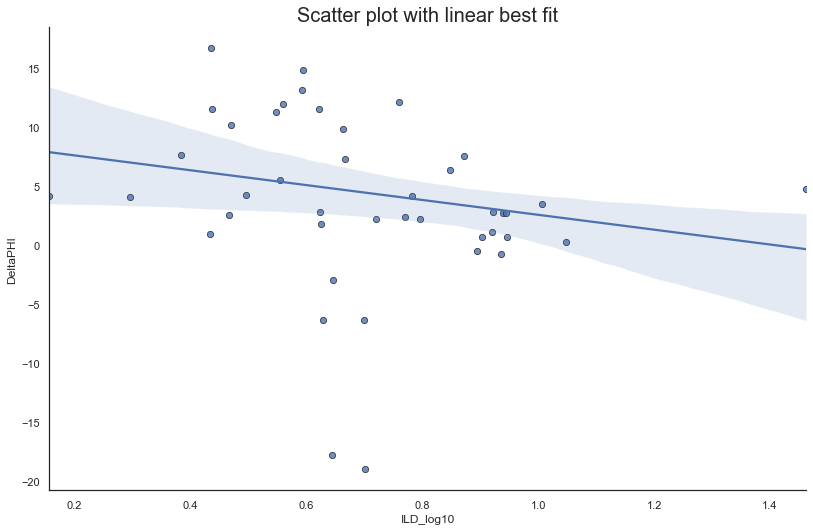

In [21]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

# Plot
sns.set_style("white")
gridobj = sns.lmplot(x="ILD_log10", y="DeltaPHI", data=data.iloc[::100, 5:7], 
                     height=7, aspect=1.6, robust=True, palette='tab10', 
                     scatter_kws=dict(s=40, linewidths=.7, edgecolors='black'))

# Decorations
# gridobj.set(xlim=(0.5, 7.5), ylim=(0, 50))
plt.title("Scatter plot with linear best fit", fontsize=20)
plt.show()

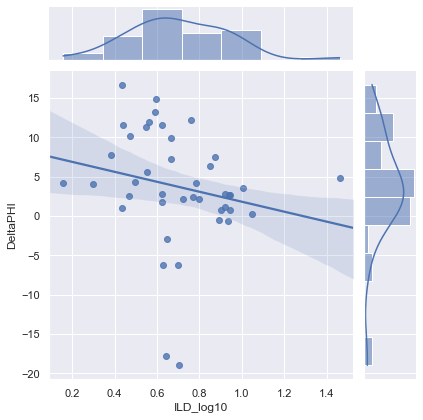

In [28]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

data = pd.read_csv('../datasets/welllog_csv/welllogs.csv')

gridobj = sns.jointplot(x="ILD_log10", y="DeltaPHI", data=data.iloc[::100, 5:7], kind="reg", truncate=False)  
plt.show()

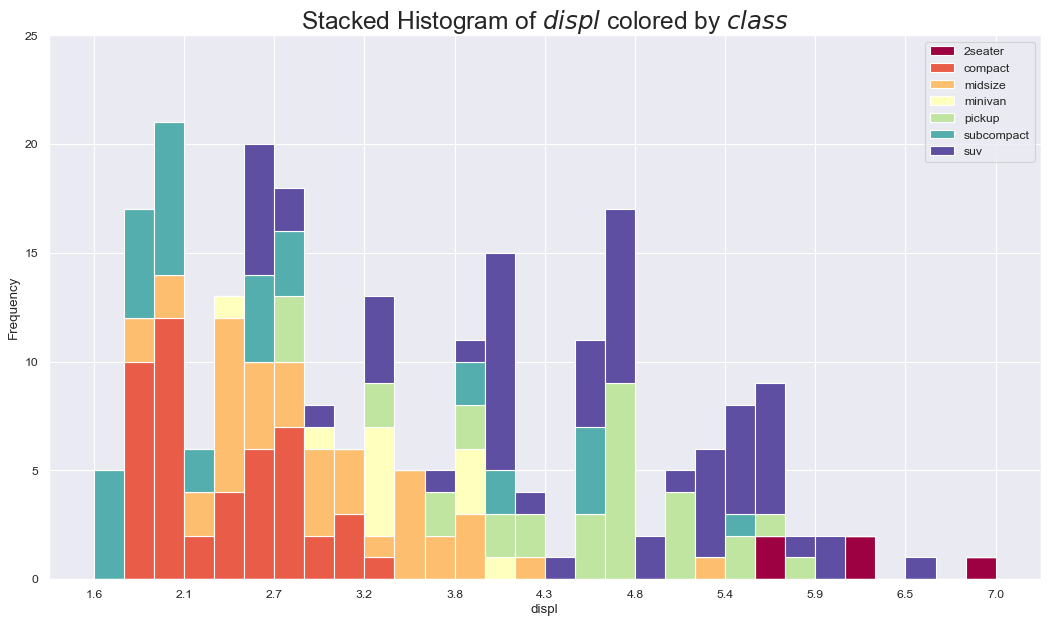

In [30]:
import numpy as np

df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Prepare data
x_var = 'displ'
groupby_var = 'class'
df_agg = df.loc[:, [x_var, groupby_var]].groupby(groupby_var)
vals = [df[x_var].values.tolist() for i, df in df_agg]

# Draw
plt.figure(figsize=(16,9), dpi= 80)
colors = [plt.cm.Spectral(i/float(len(vals)-1)) for i in range(len(vals))]
n, bins, patches = plt.hist(vals, 30, stacked=True, density=False, color=colors[:len(vals)])

# Decoration
plt.legend({group:col for group, col in zip(np.unique(df[groupby_var]).tolist(), colors[:len(vals)])})
plt.title(f"Stacked Histogram of ${x_var}$ colored by ${groupby_var}$", fontsize=22)
plt.xlabel(x_var)
plt.ylabel("Frequency")
plt.ylim(0, 25)
plt.xticks(ticks=bins[::3], labels=[round(b,1) for b in bins[::3]])
plt.show()

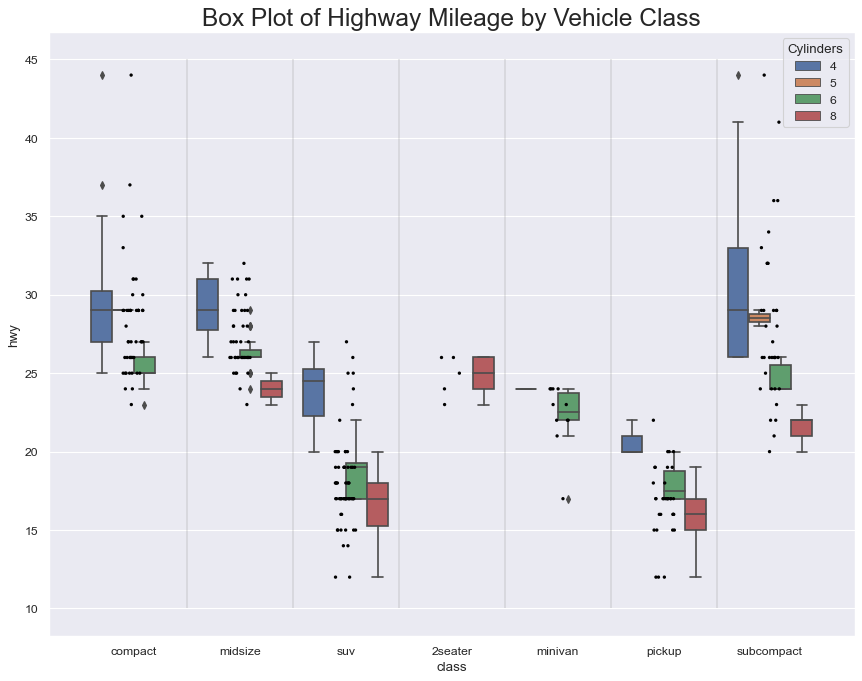

In [31]:
df = pd.read_csv("https://github.com/selva86/datasets/raw/master/mpg_ggplot2.csv")

# Draw Plot
plt.figure(figsize=(13,10), dpi= 80)
sns.boxplot(x='class', y='hwy', data=df, hue='cyl')
sns.stripplot(x='class', y='hwy', data=df, color='black', size=3, jitter=1)

for i in range(len(df['class'].unique())-1):
    plt.vlines(i+.5, 10, 45, linestyles='solid', colors='gray', alpha=0.2)

# Decoration
plt.title('Box Plot of Highway Mileage by Vehicle Class', fontsize=22)
plt.legend(title='Cylinders')
plt.show()

<p align="center">
  <img width="500" src="pictures/scatter_9_facies.png">
</p>

<p align="center">
  <img width="500" src="pictures/Newby.svg">
</p>